Código que lê um arquivo .csv contendo os valores das energias obtidas pelo Mathematica e faz um gráfico da energia em função do seu parâmetro variacional. 
É feita uma interpolação a partir dos dados lidos, para obter um valor melhor da energia.

In [1]:
import pylab as plt
import numpy as np
import csv
from scipy.interpolate import interp1d

In [2]:
nome_do_arquivo = 'quantum_dot_10.03.csv' # arquivo que desejamos ler
E_input = [] # valores da energia lidos do arquivo nome_do_arquivo

with open(nome_do_arquivo) as file:
    data = list(csv.reader(file))

    # leitura dos parâmetros
    a = float(data[0][0])
    lambIni = float(data[0][1])
    lambFin = float(data[0][2])
    lambN = int(data[0][3])
    
    # leitura das energias
    for elem in data[1:]:
        E_input.append(float(elem[0]))

In [3]:
lambs = np.linspace(lambIni, lambFin, lambN) # range em lambda de nome_do_arquivo
interp = interp1d(lambs, E_input, kind='cubic') # interpolação cúbica
lambs = np.linspace(lambIni, lambFin, 1000) # novo range em lambda
Es = interp(lambs) # valores de energia para o novo range

In [4]:
energia = np.amin(Es) # energia de ligação
lamb = lambs[np.where(Es == np.amin(Es))[0][0]] # lambda da energia de ligação

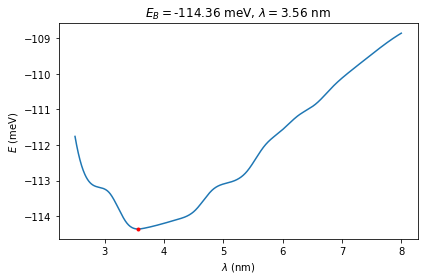

In [5]:
nome = "quantum_dot_" + str(a) + ".svg"  # nome da imagem que será gerada

plt.plot(lambs, np.array(Es))
plt.xlabel(r'$\lambda$' + ' (nm)')
plt.ylabel(r'$E$' + ' (meV)')
plt.title(r'$E_B = $' + str(round(energia, 2)) + ' meV, ' + r'$\lambda = $' +\
          str(round(lamb, 2)) + ' nm')
plt.plot(lamb, energia, 'r.')
plt.tight_layout()
plt.savefig(nome)
plt.show()